##  Analyzing Global Population Trends and Their Socioeconomic Implications

## BUSINESS UNDERSTANDING


The objective of this data science project is to analyze global population trends and understand their potential socioeconomic implications using a comprehensive dataset   
The project aims to provide insights into how population growth and distribution have evolved over time and how they correlate with different socioeconomic factors.  

## DATA UNDERSTANDING

The datasets is obtained from The World Bank website [Population](https://data.worldbank.org/indicator/SP.POP.TOTL)

The dataset contains information about the population of various countries over several decades, along with additional details such as region and income group.   
Columns of the population dataset include: 
* ``` Country Name ``` : The name of the country or region.   
* ``` Country Code ```: A unique code or identifier for each country or region.       
* ```Indicator Name```: The name of the indicator or measurement, which in this case is "Population, total."     
* ``` Indicator Code```: A code that identifies the specific  indicator, which is "SP.POP.TOTL" for total population.     
 
The columns from the metadata: 
  
* ```IncomeGroup```: The income group to which the country belongs, such as "High income" or "Low income." Similar to the 'Region' column, not all countries have this information (indicated by NaN).

* ```SpecialNotes```: Additional notes or information related to the country. This column contains text descriptions that may provide context or explanations for specific countries or regions.

* ```TableName```: The name of the country or region.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
    
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
    
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
    
    def get_info(self):
        info = self.df.info()
        return info
    
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes
    
    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts
    


In [3]:
# preview the dataset
population = pd.read_csv('dataset\API_SP.POP.TOTL_DS2_en_csv_v2_5795797.csv', delimiter='\t')
population.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2013         2014         2015         2016  \
0      58782.0  ...     102880.0     103594.0     104257.0     104874.0   
1  149742351.0  ...  567892149.0  583651101.0  600008424.0  616377605.0   
2    9565147.0  ...   31541209.0   32716210.0   33753499.0   34636207.0   
3  108336203.0  ...  387204553.0  397855507.0  408690375.0  419778384.0   
4    5736582.0  ...   26147002.0   27128337.0   28127721.0   29154746.0   

          2017         2018         2019         2020         2021  \
0     105439.0     105962.0     106442.0     106585.0     106537.0   
1  632746570.0  649757148.0  667242986.0  685112979.0  702977106.0   
2   35643418.0   36686784.0   37769499.0   38972230.0   40099462.0   
3  431138704.0  442646825.0  454306063.0  466189102.0  478185907.0   
4   30208628.0   31273533.0   32353588.0   33428486.0   34503774.0   

          2022  
0     106445.0  
1  720839314.0  
2   41128771.0  
3  490330870.0  
4   35588987.0  

[5 rows x 67 columns]

In [4]:
# Initialize the DataUnderstanding class
du = DataUnderstanding(population)

In [5]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


1960          1961          1962          1963          1964  \
count  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02   
mean   1.172707e+08  1.188803e+08  1.210506e+08  1.237328e+08  1.264374e+08   
std    3.695437e+08  3.740896e+08  3.808059e+08  3.895038e+08  3.982438e+08   
min    2.646000e+03  2.888000e+03  3.171000e+03  3.481000e+03  3.811000e+03   
25%    5.132212e+05  5.231345e+05  5.337595e+05  5.449288e+05  5.566630e+05   
50%    3.757486e+06  3.887144e+06  4.023896e+06  4.139356e+06  4.224612e+06   
75%    2.670606e+07  2.748694e+07  2.830289e+07  2.914708e+07  3.001684e+07   
max    3.031474e+09  3.072422e+09  3.126850e+09  3.193429e+09  3.260442e+09   

               1965          1966          1967          1968          1969  \
count  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02   
mean   1.291808e+08  1.320399e+08  1.348975e+08  1.378354e+08  1.408784e+08   
std    4.071151e+08  4.164502e+08  4.257422e+08  4.353216e+08  4.452925e+08   
min    4.161000e+03  4.531000e+03  4.930000e+03  5.354000e+03  5.646000e+03   
25%    5.651150e+05  5.691470e+05  5.773872e+05  5.832700e+05  5.875942e+05   
50%    4.277636e+06  4.331825e+06  4.385700e+06  4.450934e+06  4.530800e+06   
75%    3.084892e+07  3.163010e+07  3.209247e+07  3.249927e+07  3.277149e+07   
max    3.328209e+09  3.398480e+09  3.468371e+09  3.540164e+09  3.614573e+09   

       ...          2013          2014          2015          2016  \
count  ...  2.650000e+02  2.650000e+02  2.650000e+02  2.650000e+02   
mean   ...  2.927775e+08  2.966763e+08  3.005450e+08  3.044039e+08   
std    ...  9.186842e+08  9.301439e+08  9.414551e+08  9.526713e+08   
min    ...  1.069400e+04  1.089900e+04  1.087700e+04  1.085200e+04   
25%    ...  1.697753e+06  1.743309e+06  1.788196e+06  1.777557e+06   
50%    ...  1.014958e+07  1.028212e+07  1.035808e+07  1.032545e+07   
75%    ...  6.023395e+07  6.078914e+07  6.073058e+07  6.062750e+07   
max    ...  7.229732e+09  7.317970e+09  7.405278e+09  7.492157e+09   

               2017          2018          2019          2020          2021  \
count  2.650000e+02  2.650000e+02  2.650000e+02  2.650000e+02  2.650000e+02   
mean   3.082563e+08  3.120264e+08  3.157098e+08  3.192923e+08  3.225167e+08   
std    9.638565e+08  9.746872e+08  9.851681e+08  9.952286e+08  1.004210e+09   
min    1.082800e+04  1.086500e+04  1.095600e+04  1.106900e+04  1.120400e+04   
25%    1.791003e+06  1.797085e+06  1.788878e+06  1.790133e+06  1.786038e+06   
50%    1.030030e+07  1.039533e+07  1.044767e+07  1.060623e+07  1.050577e+07   
75%    6.053671e+07  6.042176e+07  5.987258e+07  6.170452e+07  6.358833e+07   
max    7.578221e+09  7.661777e+09  7.742682e+09  7.820964e+09  7.888161e+09   

               2022  
count  2.650000e+02  
mean   3.254826e+08  
std    1.012173e+09  
min    1.131200e+04  
25%    1.761985e+06  
50%    1.052607e+07  
75%    6.549775e+07  
max    7.951150e+09  

[8 rows x 63 columns]

In [6]:
# get summary of the data
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

The dataset above contain information about population totals for various countries over several years, with columns representing different years from 1960 to 2022.   
The data contains a total of 266 rows (entries), each representing a different country or region, and 67 columns

In [7]:
# Get data types
du.get_dtypes()

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
Length: 67, dtype: object

In [8]:
# preview the dataset
metadata = pd.read_csv('dataset\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5795797.csv')
metadata.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4                       Angola         NaN

In [9]:
# Initialize the DataUnderstanding class
du2 = DataUnderstanding(metadata)

In [10]:
# get summary of the data
du2.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


The above data contains 256 entries and 6 columns


In [11]:
# Get data types
du2.get_dtypes()

Country Code     object
Region           object
IncomeGroup      object
SpecialNotes     object
TableName        object
Unnamed: 5      float64
dtype: object

## DATA PREPARATION 

#### Population dataset

In [12]:
# Check for missing values
du.get_missing_values()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2018              1
2019              1
2020              1
2021              1
2022              1
Length: 67, dtype: int64

Since there are few  missing values in the dataset i can drop them 

In [13]:
population = population.dropna()

In [14]:
# confirm missing values
population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

In [15]:
# get value counts
du.get_value_counts()

{'Country Name': Aruba                   1
 Oman                    1
 Malawi                  1
 Malaysia                1
 North America           1
                        ..
 Guyana                  1
 High income             1
 Hong Kong SAR, China    1
 Honduras                1
 Zimbabwe                1
 Name: Country Name, Length: 266, dtype: int64,
 'Country Code': ABW    1
 OMN    1
 MWI    1
 MYS    1
 NAC    1
       ..
 GUY    1
 HIC    1
 HKG    1
 HND    1
 ZWE    1
 Name: Country Code, Length: 266, dtype: int64,
 'Indicator Name': Population, total    266
 Name: Indicator Name, dtype: int64,
 'Indicator Code': SP.POP.TOTL    266
 Name: Indicator Code, dtype: int64,
 '1960': 571192428.0    2
 97179656.0     2
 227948869.0    2
 32500.0        2
 3497431.0      1
               ..
 4128880.0      1
 72374.0        1
 571990.0       1
 780138593.0    1
 3806310.0      1
 Name: 1960, Length: 260, dtype: int64,
 '1961': 21907.0        2
 233483265.0    2
 99620285.0     2
 

#### Metadata

In [16]:
# check for missing values
du2.get_missing_values()

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    139
TableName         0
Unnamed: 5      265
dtype: int64

####  dealing with the missing values

Since the unnamed: 5 column's values is all Nan i will drop the column

In [17]:
metadata = metadata.drop('Unnamed: 5', axis=1) 

In [18]:
# Drop the missing values in Region and IncomeGroup
metadata = metadata.dropna(subset=['Region', 'IncomeGroup'])

In [19]:
# Find percentage of the missing values in SpecialNotes columns 
special_notes_column = 'SpecialNotes'
missing_percentage = (metadata[special_notes_column].isna().sum() / len(metadata)) * 100

In [20]:
# Set a threshold percentage (e.g., 50%) to decide whether to drop the column
threshold_percentage = 50

# Drop the 'SpecialNotes' column if it has more missing values than the threshold
if missing_percentage > threshold_percentage:
   metadata = metadata.drop(special_notes_column, axis=1)


In [21]:
# confirm missing values in the dataset
metadata.isnull().sum()

Country Code    0
Region          0
IncomeGroup     0
TableName       0
dtype: int64

Replace the TableName column name to Country Name

In [22]:
metadata = metadata.rename(columns={'TableName': 'Country Name'})

#### Merge the two dataset

In [24]:
merged_data = pd.merge(population, metadata,  on=['Country Code', 'Country Name'], how='inner')
merged_data.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54608.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8622466.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5357195.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL     9443.0   

        1961       1962       1963       1964       1965  ...        2015  \
0    55811.0    56682.0    57475.0    58178.0    58782.0  ...    104257.0   
1  8790140.0  8969047.0  9157465.0  9355514.0  9565147.0  ...  33753499.0   
2  5441333.0  5521400.0  5599827.0  5673199.0  5736582.0  ...  28127721.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2880703.0   
4    10216.0    11014.0    11839.0    12690.0    13563.0  ...     71746.0   

         2016        2017        2018        2019        2020        2021  \
0    104874.0    105439.0    105962.0    106442.0    106585.0    106537.0   
1  34636207.0  35643418.0  36686784.0  37769499.0  38972230.0  40099462.0   
2  29154746.0  30208628.0  31273533.0  32353588.0  33428486.0  34503774.0   
3   2876101.0   2873457.0   2866376.0   2854191.0   2837849.0   2811666.0   
4     72540.0     73837.0     75013.0     76343.0     77700.0     79034.0   

         2022                     Region          IncomeGroup  
0    106445.0  Latin America & Caribbean          High income  
1  41128771.0                 South Asia           Low income  
2  35588987.0         Sub-Saharan Africa  Lower middle income  
3   2775634.0      Europe & Central Asia  Upper middle income  
4     79824.0      Europe & Central Asia          High income  

[5 rows x 69 columns]

## Data Visualization

In [ ]:
Categorical_column

### Univariate Analysis

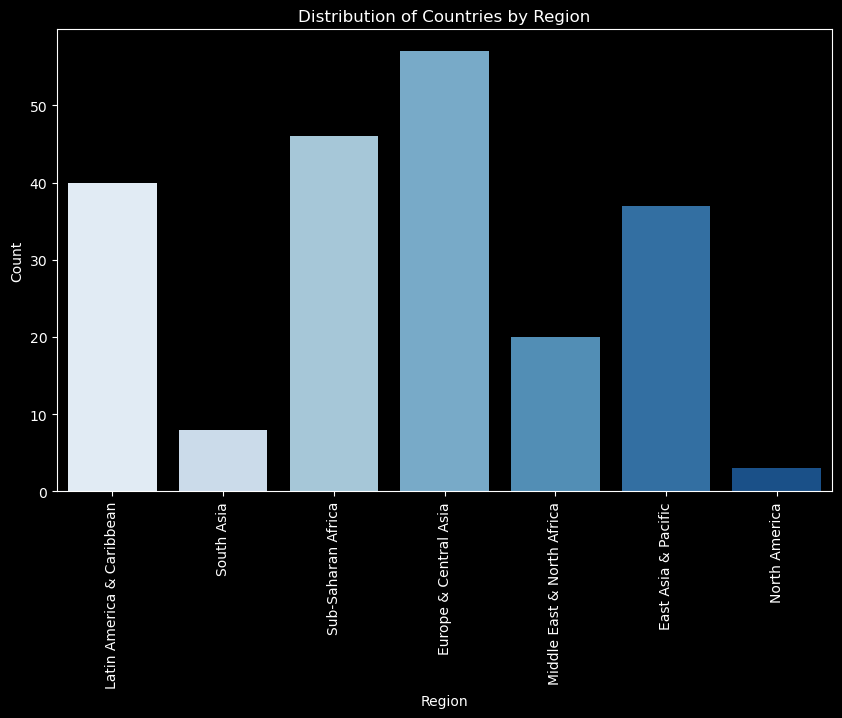

In [26]:
# Set the style to dark_background
plt.style.use("dark_background")

# Create a custom palette with shades of blue
custom_palette = sns.color_palette("Blues", n_colors=len(merged_data['Region'].unique()))

# Create a bar chart of regions
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Region', palette=custom_palette)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Countries by Region')
plt.show()



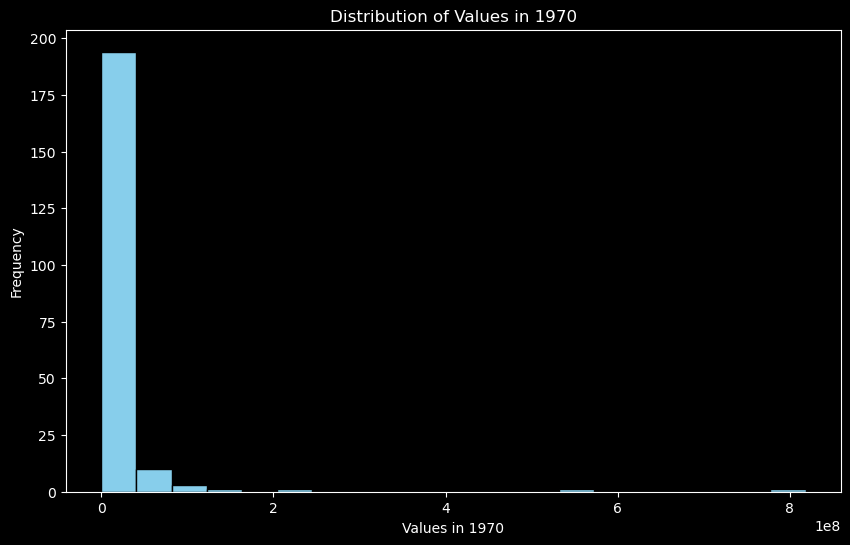

In [27]:
# Create a histogram for a specific year (e.g., 1970)
year = '1970'
plt.figure(figsize=(10, 6))
plt.hist(merged_data[year], bins=20, color='skyblue', edgecolor='black')
plt.xlabel(f'Values in {year}')
plt.ylabel('Frequency')
plt.title(f'Distribution of Values in {year}')
plt.show()

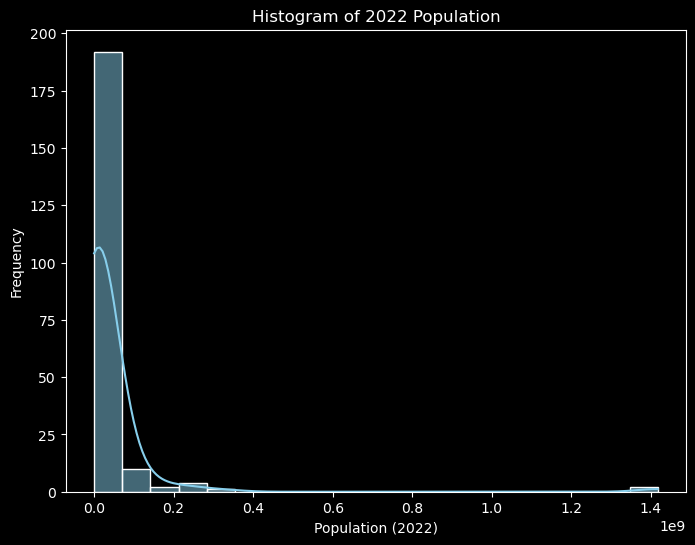

In [28]:
 # Histogram of Population (2022) 

plt.figure(figsize=(8, 6))
sns.histplot(merged_data['2022'], bins=20, kde=True, color='skyblue')
plt.xlabel('Population (2022)')
plt.ylabel('Frequency')
plt.title('Histogram of 2022 Population')
plt.show()



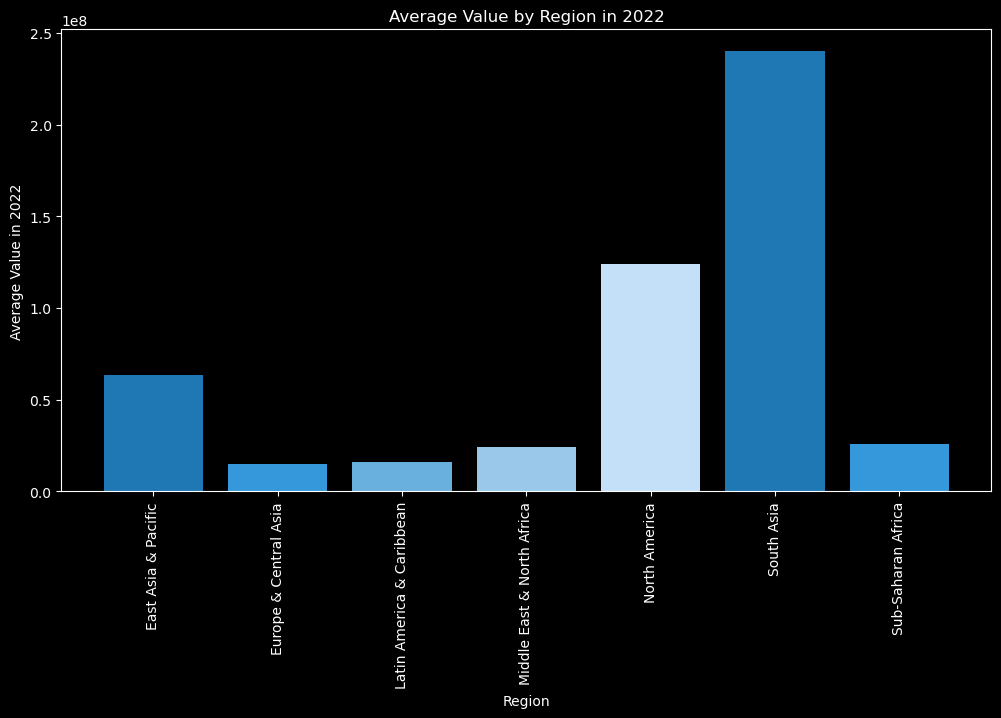

In [29]:
# Calculate the average value for each region for the year 2022
region_avg = merged_data.groupby('Region')['2022'].mean().reset_index()

# Define a list of shades of blue
shades_of_blue = ['#1f77b4', '#3498db', '#6ab0de', '#9ac8eb', '#c4e0f9']

plt.figure(figsize=(12, 6))
plt.bar(region_avg['Region'], region_avg['2022'], color=shades_of_blue)
plt.xlabel('Region')
plt.ylabel(f'Average Value in 2022')
plt.title(f'Average Value by Region in 2022')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



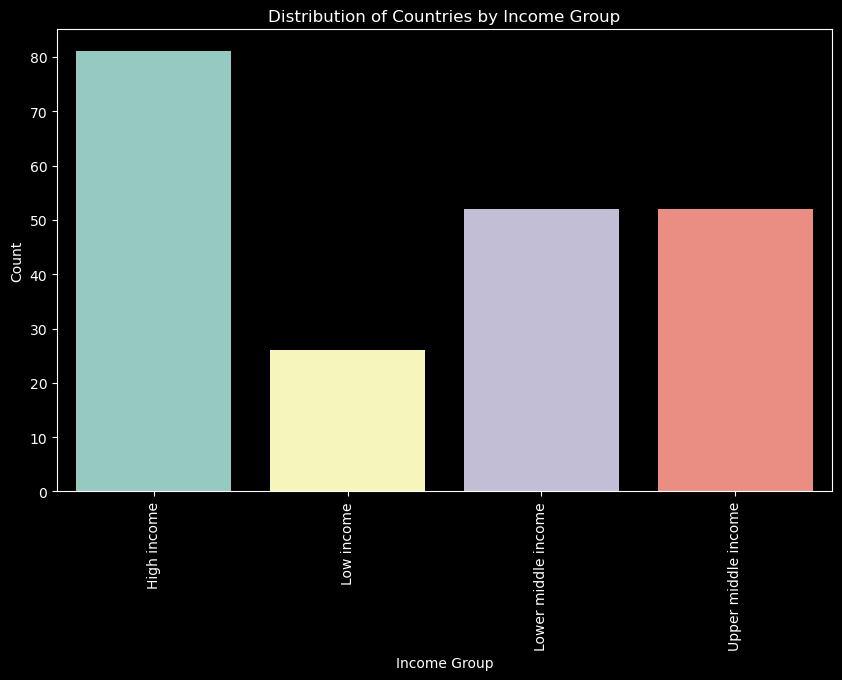

In [30]:
# Create a figure for the bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart for IncomeGroup
sns.countplot(data=merged_data, x='IncomeGroup', palette='Set3')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Distribution of Countries by Income Group')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()




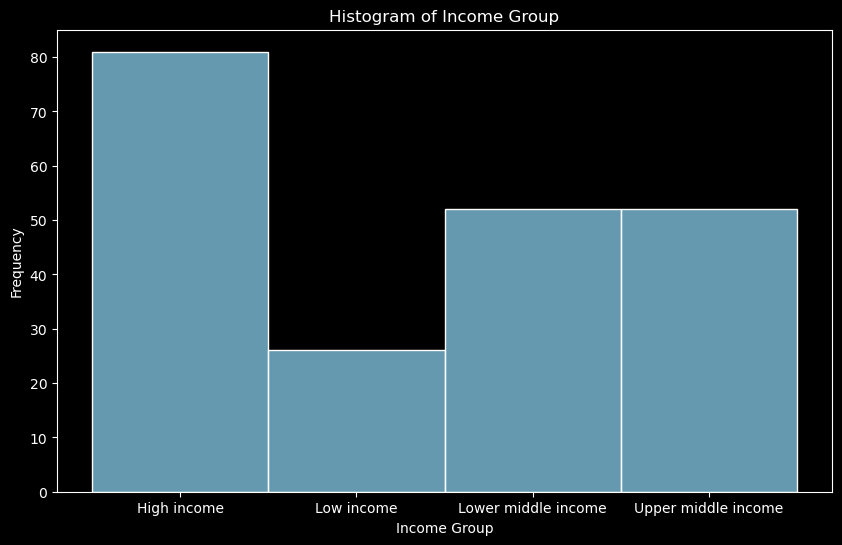

In [31]:
# Create a figure for the histogram
plt.figure(figsize=(10, 6))

# Create a histogram of IncomeGroup
sns.histplot(merged_data['IncomeGroup'], color='skyblue', bins=len(merged_data['IncomeGroup'].unique()))
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Histogram of Income Group')

plt.show()

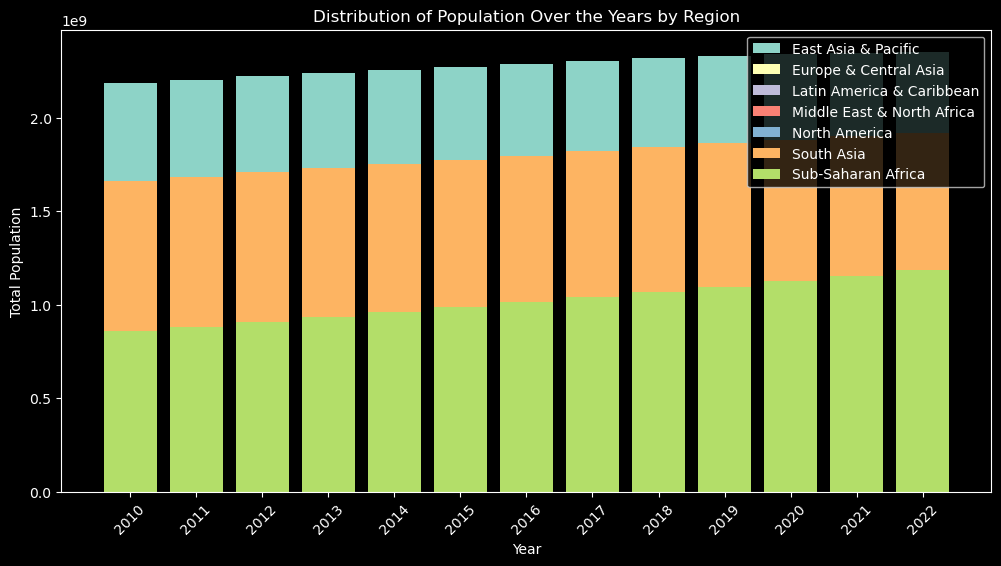

In [32]:
region_populations = merged_data.groupby('Region')[[str(year) for year in range(2010, 2023)]].sum()

# Transpose the data for plotting
region_populations = region_populations.transpose()

# Create a bar graph for each region's population over the years
plt.figure(figsize=(12, 6))
for region in region_populations.columns:
    plt.bar(region_populations.index, region_populations[region], label=region)

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Distribution of Population Over the Years by Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()

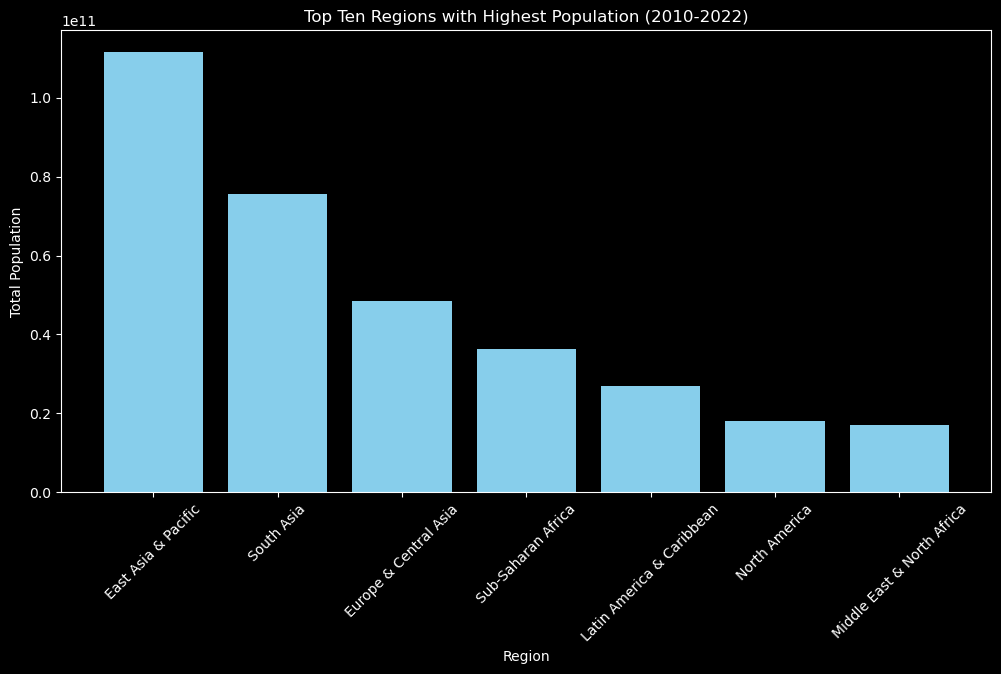

In [33]:
# Extract the relevant columns for years 2010 to 2022
years = [str(year) for year in range(1960, 2023)]
region_populations = merged_data[['Region'] + years]
# Group the data by region and calculate the total population for each region
region_total_population = region_populations.groupby('Region').sum()

# Calculate the total population for each region over the specified years
region_total_population['Total'] = region_total_population.sum(axis=1)

# Sort the regions by total population in descending order
top_ten_regions = region_total_population.sort_values(by='Total', ascending=False).head(10)

# Create a bar plot for the top ten regions
plt.figure(figsize=(12, 6))
plt.bar(top_ten_regions.index, top_ten_regions['Total'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.title('Top Ten Regions with Highest Population (2010-2022)')
plt.xticks(rotation=45)
plt.show()

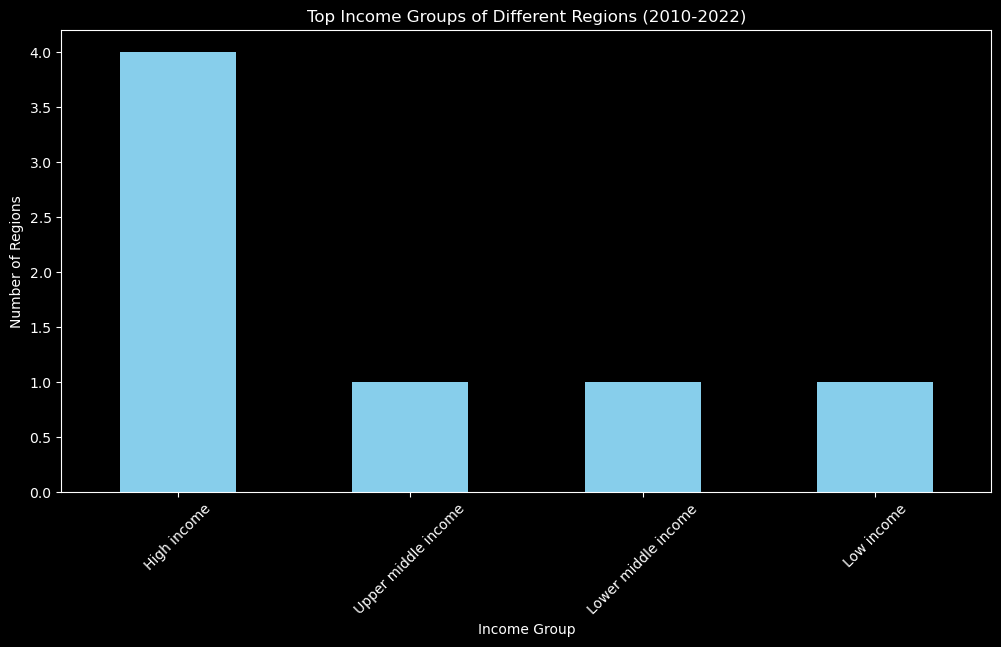

In [34]:
# Extract the relevant columns for years 2010 to 2022 and IncomeGroup
years = [str(year) for year in range(2010, 2023)]
region_income_groups = merged_data[['Region', 'IncomeGroup'] + years]

# Group the data by region and calculate the most common (top) income group for each region
top_income_groups = region_income_groups.groupby('Region').agg(lambda x: x.value_counts().index[0])

# Count the frequency of each income group among the top income groups
income_group_counts = top_income_groups['IncomeGroup'].value_counts()

# Create a bar plot for the top income groups across regions
plt.figure(figsize=(12, 6))
income_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Number of Regions')
plt.title('Top Income Groups of Different Regions (2010-2022)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

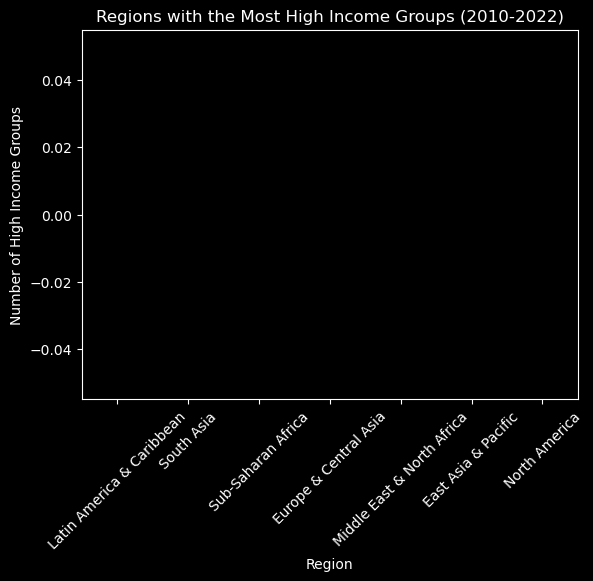

In [35]:
# Extract the relevant columns for years 2010 to 2022 and IncomeGroup
years = [str(year) for year in range(2010, 2023)]
region_income_groups = merged_data[['Region', 'IncomeGroup'] + years]

# Create a dictionary to count the number of high-income groups (e.g., 'High income: OECD', 'High income: nonOECD') in each region
region_high_income_counts = {}

for region in region_income_groups['Region'].unique():
    region_data = region_income_groups[region_income_groups['Region'] == region]
    high_income_count = sum(region_data[year].astype(str).str.contains('High income') for year in years)
    region_high_income_counts[region] = high_income_count.sum()

# Convert the dictionary to a DataFrame for easier sorting
region_high_income_counts_df = pd.DataFrame.from_dict(region_high_income_counts, orient='index', columns=['High Income Count'])

# Sort the regions by the count of high-income groups in descending order
top_regions_high_income = region_high_income_counts_df.sort_values(by='High Income Count', ascending=False)

# Create a bar plot for the top regions with the most high-income groups
plt.figure(figsize=(12, 6))
top_regions_high_income.plot(kind='bar', color='skyblue', legend=False)
plt.xlabel('Region')
plt.ylabel('Number of High Income Groups')
plt.title('Regions with the Most High Income Groups (2010-2022)')
plt.xticks(rotation=45)
plt.show()